# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Singapore, None, Singapore**, or **Singapore** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Singapore, None, Singapore** to Ann Arbor, USA. In that case at least one source file must be about **Singapore, None, Singapore**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Singapore, None, Singapore** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
# The thesis of this project will be that an increase in average household income directly correlates to an increase
# in sports participation of the population.

# To start with, the two relevant data files, income_data.csv and sports_data.csv are uploaded into Coursera.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#%matplotlib notebook

df = pd.read_csv("income_data.csv")

df2 = pd.read_csv("sports_data.csv")

print(df)

print(df2)


    Year  Average Yearly Income
0   2000                  71364
1   2001                  77004
2   2002                  74748
3   2003                  75312
4   2004                  75420
5   2005                  79116
6   2006                  81504
7   2007                  89172
8   2008                 100968
9   2009                  98340
10  2010                 104712
11  2011                 115416
12  2012                 124176
13  2013                 125628
14  2014                 133716
15  2015                 138120
                 1992   1997   2001   2005   2011   2014
0  Female in %  18.0%  28.0%  32.0%  43.0%  38.0%  62.0%
1    Male in %  29.0%  40.0%  45.0%  56.0%  47.0%  61.0%


In [2]:
# With regard to df2, data from years 1992 and 1997 can be dropped, as it is out of bounds for income_data.csv

df2.drop(['1992', '1997'], axis = 1, inplace = True)

df2 = df2.T

df2

,0,1
,Female in %,Male in %
2001,32.0%,45.0%
2005,43.0%,56.0%
2011,38.0%,47.0%
2014,62.0%,61.0%


In [3]:
df2.columns = ['Female in %', 'Male in %']

df2

,Female in %,Male in %
,Female in %,Male in %
2001,32.0%,45.0%
2005,43.0%,56.0%
2011,38.0%,47.0%
2014,62.0%,61.0%


In [4]:
#Selecting only relevant rows

df2 = df2[1:6]

df2

,Female in %,Male in %
2001,32.0%,45.0%
2005,43.0%,56.0%
2011,38.0%,47.0%
2014,62.0%,61.0%


In [5]:
# Converting Female and male participation into an average of total participation.
# This is done because for our purposes, distinguishing male and female participation isn't relevant.


df2['Female in %'] = df2['Female in %'].astype('str').replace({'.0%':''}, regex=True)
df2['Male in %'] = df2['Male in %'].astype('str').replace({'.0%':''}, regex=True)

#df2.replace({'%':''}, regex=True)

df2['Participation'] = (df2['Female in %'].astype('int') + df2['Male in %'].astype('int'))/2

df2.drop(['Female in %', 'Male in %'], axis = 1, inplace = True)


df2 = df2.rename(columns={'Participation': 'Participation (%)'})

df2['Year'] = df2.index

df2.reset_index


print(df2)

type(df2)

print(df2.columns)
print(df2.index)



      Participation (%)  Year
2001               38.5  2001
2005               49.5  2005
2011               42.5  2011
2014               61.5  2014
Index(['Participation (%)', 'Year'], dtype='object')
Index(['2001', '2005', '2011', '2014'], dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

In [6]:
df.set_index('Year')

df.rename(columns={'Average Yearly Income': 'Average Yearly Income ($)'}, inplace = True)

print(df)

print(type(df))

print(df.columns)


    Year  Average Yearly Income ($)
0   2000                      71364
1   2001                      77004
2   2002                      74748
3   2003                      75312
4   2004                      75420
5   2005                      79116
6   2006                      81504
7   2007                      89172
8   2008                     100968
9   2009                      98340
10  2010                     104712
11  2011                     115416
12  2012                     124176
13  2013                     125628
14  2014                     133716
15  2015                     138120
<class 'pandas.core.frame.DataFrame'>
Index(['Year', 'Average Yearly Income ($)'], dtype='object')


<IPython.core.display.Javascript object>


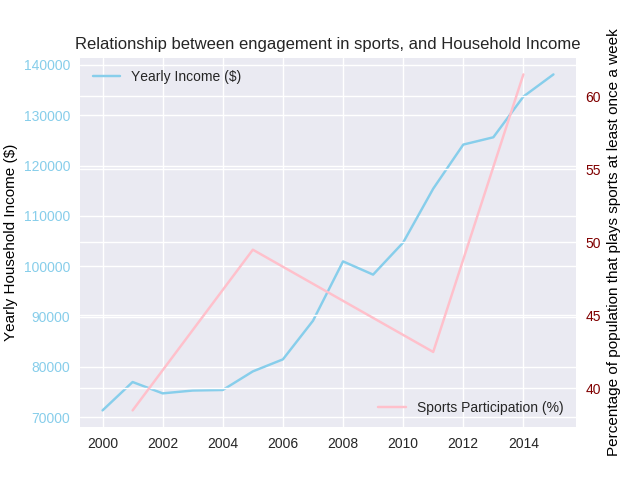

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().magic('matplotlib notebook')

year1 = df['Year'].tolist()
s1 = df['Average Yearly Income ($)'].tolist()

fig, ax1 = plt.subplots()
t = year1
s1 = df['Average Yearly Income ($)'].tolist()
ax1.plot(t, s1, 'b-', color = 'skyblue', label="Yearly Income ($)")
ax1.set_ylabel('Yearly Household Income ($)', color='black')
ax1.tick_params('y', colors='skyblue')
plt.legend(loc='upper left')

z = df2['Year'].tolist()
s2 = df2['Participation (%)'].tolist()

ax2 = ax1.twinx()
ax2.plot(z, s2, '-0', color = 'pink', label="Sports Participation (%)")
ax2.set_ylabel('Percentage of population that plays sports at least once a week', color='black')
ax2.tick_params('y', colors='maroon')
#ax2.legend(loc='upper left')

plt.title('Relationship between engagement in sports, and Household Income')
plt.legend(loc=4)

plt.show()



# ax = df.plot(x = 'Year', y = 'Average Yearly Income ($)', figsize=(10,8),alpha=0.8, legend=True)

# df2.plot(ax=ax, x = 'Year', y = 'Participation (%)', figsize=(10,8),alpha=0.8, legend=True, kind = 'bar', width = 0.2, color='pink')


#graph = df.plot(x = 'Year', y = 'Average Yearly Income ($)', figsize=(10,8),alpha=0.8, legend=True)
# ax = plt.gca()
# x = ax.xaxis

# graph2 = df2.plot(x = 'Year', y = 'Participation (%)', figsize=(10,8),alpha=0.8, legend=True, kind = 'bar', width = 0.2, color='pink', sharex=graph)



